# Unsupervised Learning: Discovering Patterns From The Unknown

## What is it?
- It is a branch of machine learning where algorithms learn from unlabeled data. 
- Unlike supervised learning, where data is pre-categorized, unsupervised learning models discover patterns and structures within the data on their own.
- It enables algorithms to work independently to discover hidden information in the data without guidance.
- It classifies unsorted information according to patterns, differences, or similarities.

**Example**</br>
Imagine you have a box of mixed fruits but no labels. Unsupervised learning would be like asking a computer to sort these fruits into groups based on their similarities, without telling it what the fruits are.

## Types of Unsupervised Learning
- **Clustering** Grouping similar data points together. e.g. grouping fruits based on similar color, shape, texture, etc... grouping customers based on purchasing behavior. examples of subgroups:
    - Sub Group 1:
        - Age (12 - 18)
        - Gender (Female)
        - Favorite ice cream (pink ice cream)
    - Sub Group 2:
        - Age (23 - 50)
        - Gender (Female)
        - Favorite ice cream (chocolate or coffee )
- **Dimensionality Reduction** Simplifying/summarizing the number of features (dimensions) while preserving their essential information. It's mainly used for visualization, interpretation, and performance optimization (speed).
- **Association** Discovering relationships between items. e.g. Recommendation engines (people who buy bread often buy a toaster)
- **Anomaly Detection** spotting the outlier or unusual data point 
</br>

**Real World Applications:**
- Customer Segmentation: launching customized marketing campaign for different segments of customers based on behavior and demographics
- Image Classification (no label): Cluster images based on common features
- Anomaly Detection: Spotting unusual data points that might indicate an anomaly (fraud or system attacks)
- Recommendation Systems: providing proper recommendation based on suer preference


## Clustering

## Types of Clustering Algorithms
- **Centroid-Based Clustering** 
    - K-Means Clustering: 
        - One of the most popular algorithms
        - It partitions the data into K-clusters based on the mean value of the data points
        - Divides data into k fixed clusters by minimizing intra-cluster variance.
    - Mean-Shift:
        - Looks for dense regions of all data points and shifts the center to the highest density area
    - K-Medoids
    - K-Means uses the average (centroid) of all points in a cluster, while K-Medoids picks an actual point (medoid) that minimizes total distance to others.
![cent](https://miro.medium.com/v2/resize:fit:1200/1*rw8IUza1dbffBhiA4i0GNQ.png)
![km](https://www.researchgate.net/publication/342871651/figure/fig1/AS:912165510864897@1594488613267/The-graphical-representation-of-the-difference-between-the-k-means-and-k-medoids.png)

- **Density-Based Clustering**
    - DBSCAN 
        - (Density-based spatial clustering of applications with noise) 
        - Groups together points that are closely packed in a sequential manner
        - It marks the outliers as noise
         
![dbscan](https://media.springernature.com/m685/springer-static/image/art%3A10.1038%2Fs41598-023-45190-4/MediaObjects/41598_2023_45190_Fig1_HTML.png)
 
- **Hierarchical Clustering**
    - Agglomerative Hierarchical Clustering:
        - Forms clusters by connecting dense regions of points and ignoring sparse noise.
        - Starts with each data point as a its own cluster
        - It merges the separate clusters based on similarities iteratively 
        - Bottom to top
    - Divisive Hierarchical Clustering:
        - opposite of Agglomerative, it starts with defining all data points as one big cluster
        - it recursively splits it into smaller clusters
        - Top to bottom

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_06_Unsupervised_Learning/dendogram.png)
- **Distribution-Based Clustering**
    - Gaussian Mixture Model (GMM): Assumes that data points are generated from a mixture of Gaussian distributions.

![GMM](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/3_gaussian-mixture-model.jpg)

## Exercise: Visualizing K-Means Clustering

- Choose 3 of the Type 1 categories from the data
- Remove the classes and use unsupervised learning to determine the classes based on 2 features (Pokemon attributes):
    - Attack 
    - Defense

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [67]:
path = '/Users/bassel_instructor/Documents/Datasets/'
df = pd.read_csv(path+'pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [68]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [69]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

1. Get Pokemon data for Grass, Fire, and Water classes/groups only
2. Remove other descriptive columns (categorical)

In [70]:
type1_filter = df['Type 1'].isin(['Grass', 'Fire', 'Water'])

drop_cols = ['#', 'Type 2', 'Generation', 'Legendary']

In [71]:
df_org = df.copy()

In [72]:
df = df[type1_filter].drop(columns=drop_cols, axis=1)
df.head()

,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,318,45,49,49,65,65,45
1,Ivysaur,Grass,405,60,62,63,80,80,60
2,Venusaur,Grass,525,80,82,83,100,100,80
3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80
4,Charmander,Fire,309,39,52,43,60,50,65


#### Build K-Means Clusters
1. Define our KMeans Functions with 3 clusters
2. Fit the data on Attack and Defense columns and add the cluster class to the data
3. Visualize the clusters
    
    1. Calculate the centroids
    2. Define a color for each
    3. Plot all the elements

In [73]:
#step 1
kmeans_model = KMeans(n_clusters=3, random_state=10)

In [74]:
#step 2
df['Cluster'] = kmeans_model.fit_predict(df[['Attack', 'Defense']])

In [75]:
df.head()

,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster
0,Bulbasaur,Grass,318,45,49,49,65,65,45,0
1,Ivysaur,Grass,405,60,62,63,80,80,60,0
2,Venusaur,Grass,525,80,82,83,100,100,80,1
3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,2
4,Charmander,Fire,309,39,52,43,60,50,65,0


In [76]:
df['Cluster'].value_counts()

Cluster
1    100
0     90
2     44
Name: count, dtype: int64

![km](https://miro.medium.com/v2/resize:fit:1200/0*_XwxbKHayTU8QG44.png)

In [77]:
#Step 3.1
centroids = kmeans_model.cluster_centers_
print(centroids)

[[ 51.22222222  50.22222222]
 [ 82.08        75.91      ]
 [114.09090909 103.15909091]]


We get 6 values for the 3 centroids. 2 for each (X and Y coordinates)

In [78]:
#split the X and Y values for the cntroids
cent_x = centroids[:,0]
cent_y = centroids[:,1]
print('centroids x:', cent_x, '\ncentroids y:',cent_y)

centroids x: [ 51.22222222  82.08       114.09090909] 
centroids y: [ 50.22222222  75.91       103.15909091]


In [79]:
df['CentX'] = df['Cluster'].map({0:cent_x[0],
                                1:cent_x[1],
                                2:cent_x[2]})

df['CentY'] = df['Cluster'].map({0:cent_y[0],
                                1:cent_y[1],
                                2:cent_y[2]})
# alternative method cent_x[df['Cluster']].astype(float)
df.head()

,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster,CentX,CentY
0,Bulbasaur,Grass,318,45,49,49,65,65,45,0,51.222222,50.222222
1,Ivysaur,Grass,405,60,62,63,80,80,60,0,51.222222,50.222222
2,Venusaur,Grass,525,80,82,83,100,100,80,1,82.080000,75.910000
3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,2,114.090909,103.159091
4,Charmander,Fire,309,39,52,43,60,50,65,0,51.222222,50.222222


In [80]:
color_list = ['#ff52bf', '#52f3ff', '#d9ff52']

df['ClusterColor'] = df['Cluster'].map({0:color_list[0],
                                        1:color_list[1],
                                        2:color_list[2]})
# alternative method df['ClusterColor'] = df['Cluster'].map(lambda c: color_list[c])

df.head()

,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster,CentX,CentY,ClusterColor
0,Bulbasaur,Grass,318,45,49,49,65,65,45,0,51.222222,50.222222,#ff52bf
1,Ivysaur,Grass,405,60,62,63,80,80,60,0,51.222222,50.222222,#ff52bf
2,Venusaur,Grass,525,80,82,83,100,100,80,1,82.080000,75.910000,#52f3ff
3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,2,114.090909,103.159091,#d9ff52
4,Charmander,Fire,309,39,52,43,60,50,65,0,51.222222,50.222222,#ff52bf


In [81]:
plt.style.use('dark_background')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


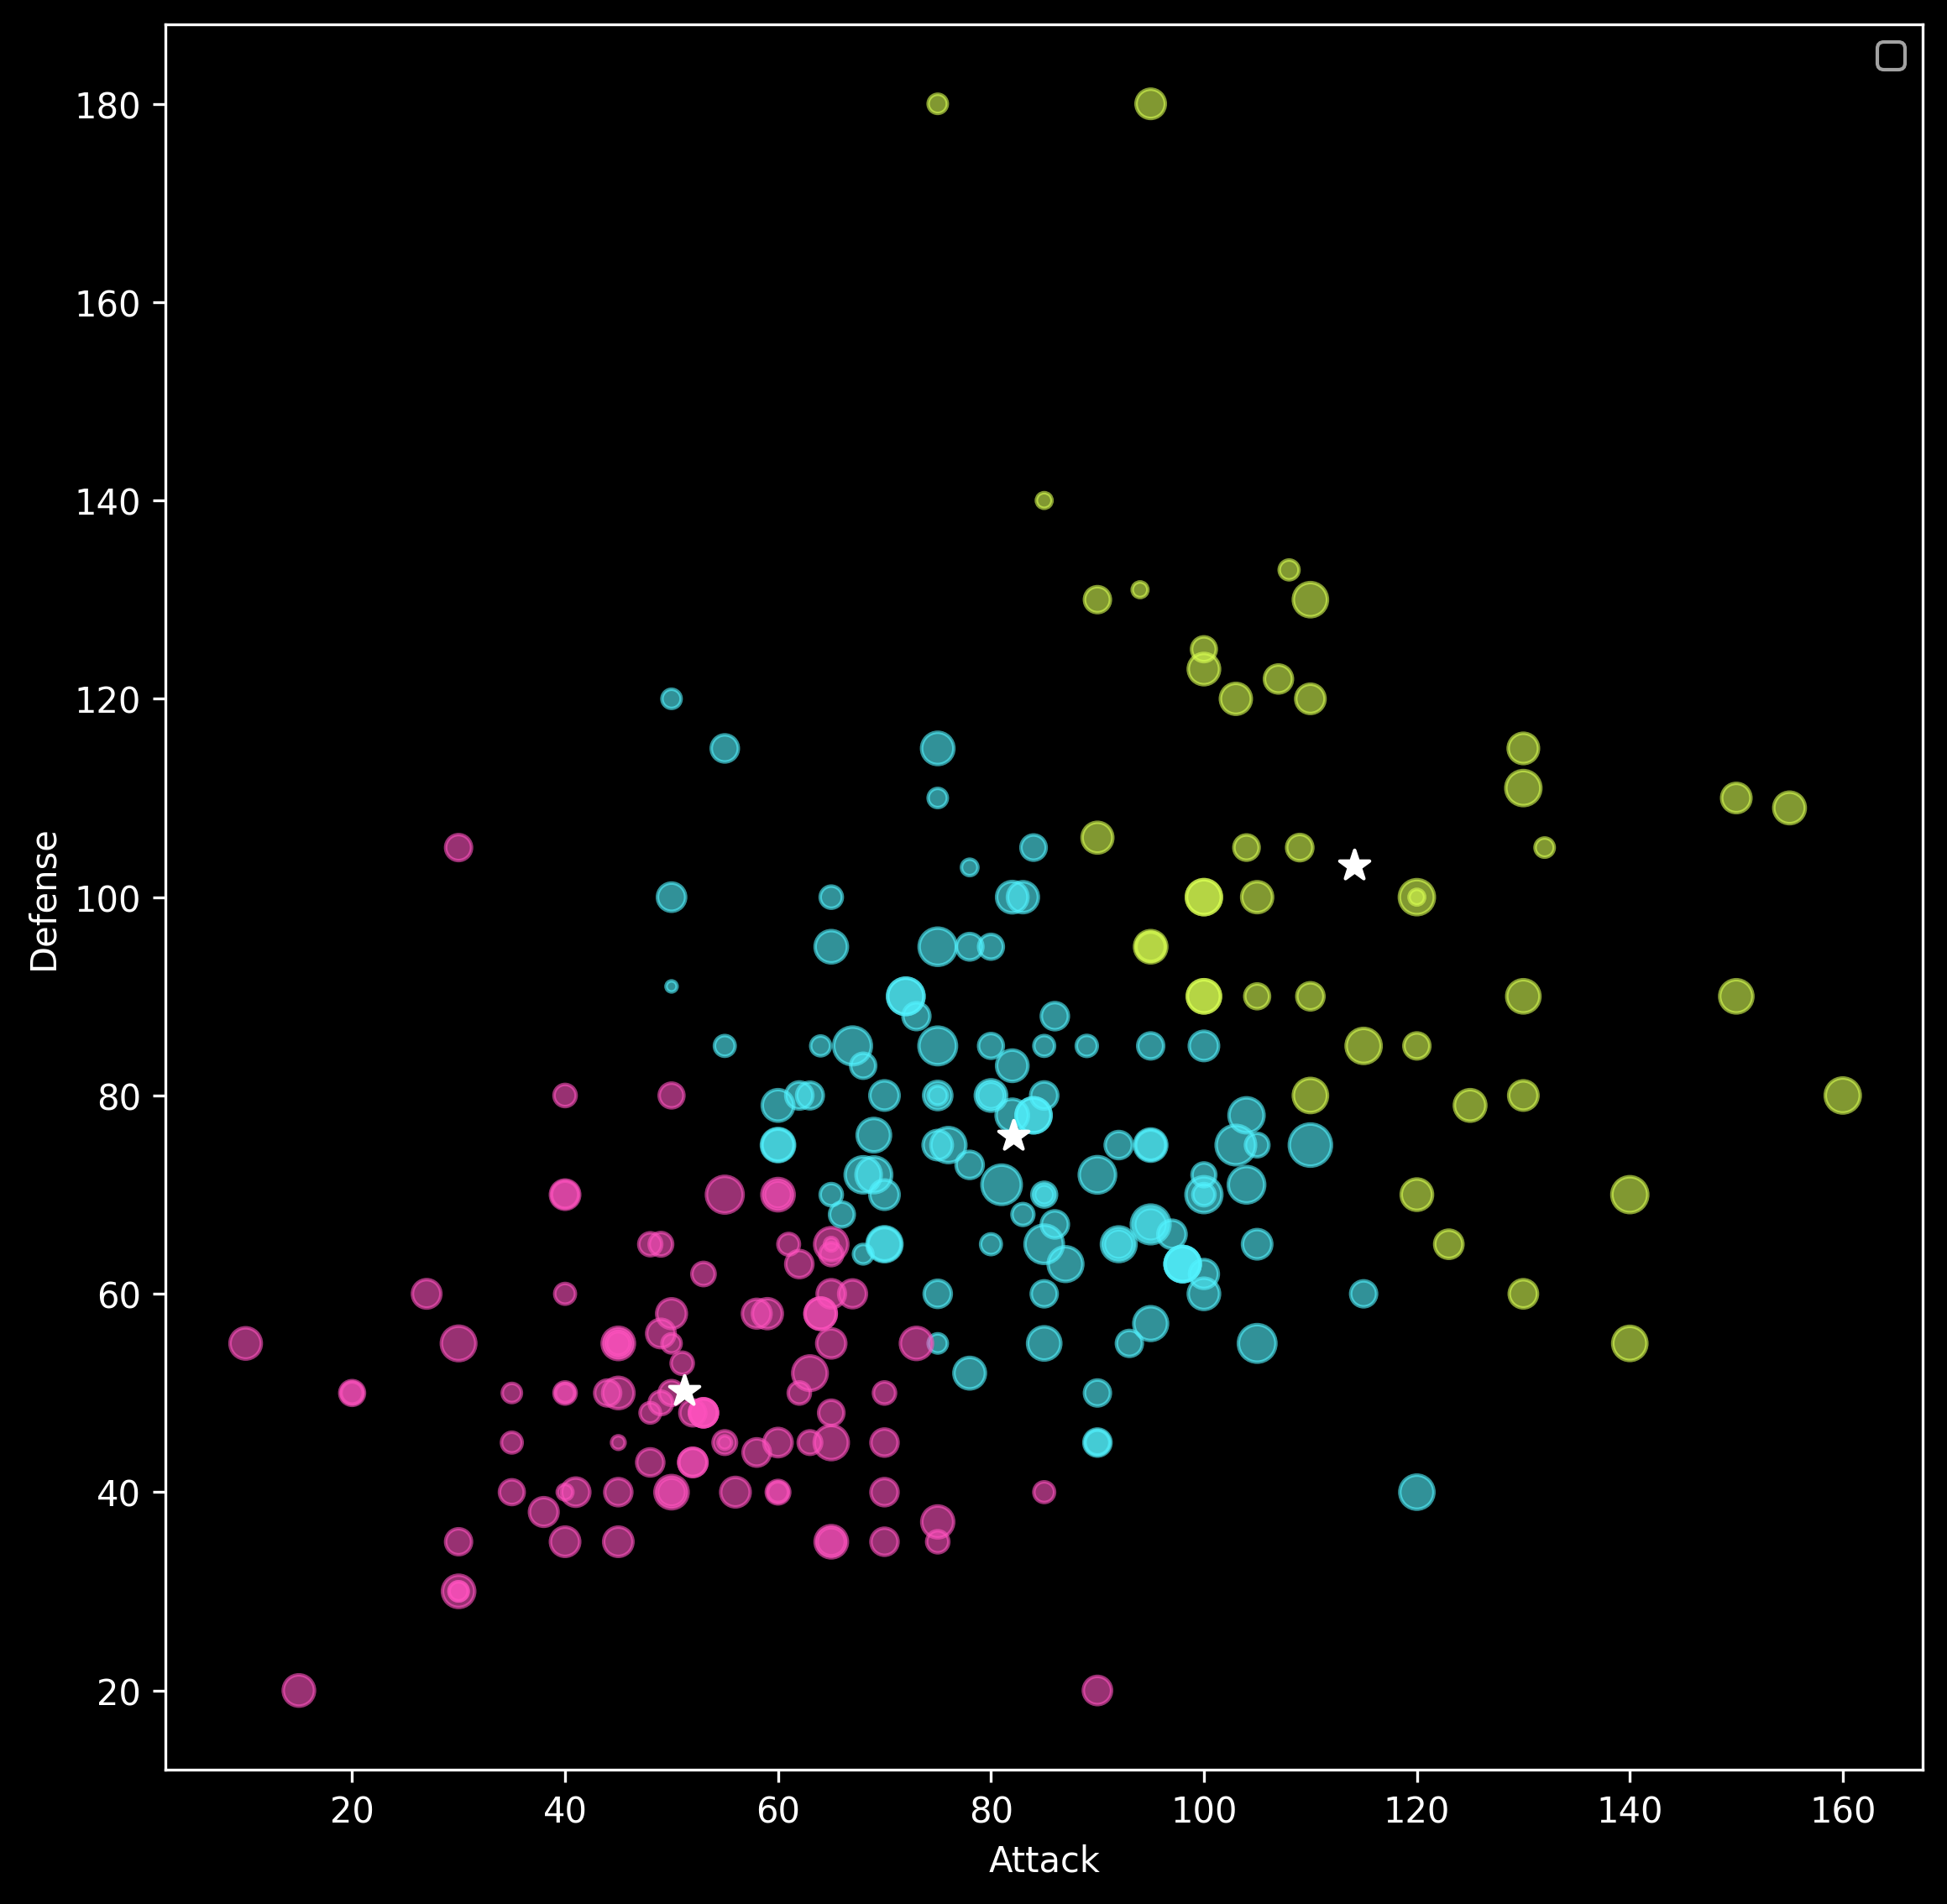

In [82]:
plt.figure(figsize=(9,9), dpi=300)

#data points
plt.scatter(x=df['Attack'], y=df['Defense'], c=df['ClusterColor'], s=df['Speed'], alpha=0.6)
#centroids
plt.scatter(x=cent_x, y=cent_y, c='white', marker='*', s=80)

plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend()

#### Performance Evaluation:
- In Unsupervised Learning we don't have the Ground Truth Labels, so we cannot compare apples-to-apples (prediction vs actual)
- Alternative:
    - Subject matter expertise: 
        - analyze the overall attributes of the clustered data points and determine if they make sense 
        - Visual evaluation
    - Metrics:
        - Silhouette Score: Cohesiveness measurement - Measures how similar a point is to its own cluster vs. others. 
        - Davies–Bouldin Index: Ratio of intra-cluster distance to inter-cluster separatio


##### 📈 Summary Table

| Metric                 | Needs Labels? | Range   | Goal          |
| ---------------------- | ------------- | ------- | ------------- |
| Adjusted Rand Index    | Yes           | -1 to 1 | Higher better |
| Normalized Mutual Info | Yes           | 0 to 1  | Higher better |
| Silhouette Score       | No            | -1 to 1 | Higher better |
| Davies-Bouldin Index   | No            | ≥ 0     | Lower better  |
| Calinski-Harabasz      | No            | > 0     | Higher better |


In [83]:
from sklearn.metrics import silhouette_score, silhouette_samples

score = silhouette_score(df[['Attack', 'Defense']], df['Cluster'])
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.3663


- Close to +1: Clusters are well-separated.
- Around 0: Clusters overlap significantly.
- Negative: Poor clustering.

##### Find the Overlapping Points

In [84]:
df['Silhouette_Val'] = silhouette_samples(df[['Attack', 'Defense']], df['Cluster'])
#spot the overlapping points
df[df['Silhouette_Val'] < 0.2]

,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster,CentX,CentY,ClusterColor,Silhouette_Val
49,Gloom,Grass,395,60,65,70,85,75,40,1,82.080000,75.910000,#52f3ff,0.103664
64,Arcanine,Fire,555,90,110,80,100,80,95,2,114.090909,103.159091,#d9ff52,-0.056970
66,Poliwhirl,Water,385,65,65,65,50,50,90,0,51.222222,50.222222,#ff52bf,0.058268
67,Poliwrath,Water,510,90,95,95,70,90,70,2,114.090909,103.159091,#d9ff52,-0.115794
79,Tentacruel,Water,515,80,70,65,80,120,100,1,82.080000,75.910000,#52f3ff,0.130041
85,Slowpoke,Water,315,90,65,65,40,40,15,0,51.222222,50.222222,#ff52bf,0.058268
86,Slowbro,Water,490,95,75,110,100,80,30,1,82.080000,75.910000,#52f3ff,0.191012
87,SlowbroMega Slowbro,Water,590,95,75,180,130,80,30,2,114.090909,103.159091,#d9ff52,0.149336
106,Krabby,Water,325,30,105,90,25,25,50,2,114.090909,103.159091,#d9ff52,0.051713
127,Goldeen,Water,320,45,67,60,35,50,63,0,51.222222,50.222222,#ff52bf,0.148146


Text(0, 0.5, 'Defense')

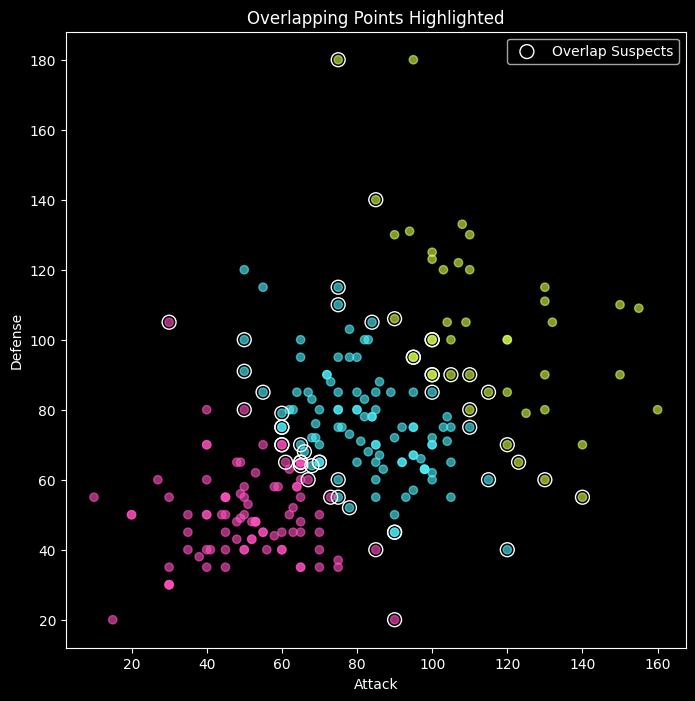

In [85]:
plt.figure(figsize=(8,8))
plt.scatter(df['Attack'], df['Defense'], c=df['ClusterColor'], alpha=0.6)
plt.scatter(
    df[df['Silhouette_Val'] < 0.2]['Attack'],
    df[df['Silhouette_Val'] < 0.2]['Defense'],
    edgecolors='white',
    facecolors='none',
    s=100,
    label='Overlap Suspects'
)
plt.legend()
plt.title('Overlapping Points Highlighted')
plt.xlabel('Attack')
plt.ylabel('Defense')

> Typically we don't have a target category to compare it to our clusters, but in this exercise it's a special case.

In [86]:
# Create a contingency table comparing clusters with Type 1 categories
contingency_table = pd.crosstab(df['Cluster'], df['Type 1'])
contingency_table


Type 1,Fire,Grass,Water
Cluster,,,
0,18,28,44
1,20,33,47
2,14,9,21


In [87]:
from scipy.stats import chi2_contingency
# Perform the Chi-square test
chi2, p_value, degrees_of_freedom, expected_values = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", degrees_of_freedom)
print("Expected values:", expected_values)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the variables.")

Chi-square statistic: 3.9585844155844137
P-value: 0.4116398552528737
Degrees of freedom: 4
Expected values: [[20.         26.92307692 43.07692308]
 [22.22222222 29.91452991 47.86324786]
 [ 9.77777778 13.16239316 21.05982906]]
Fail to reject the null hypothesis: There is no significant association between the variables.


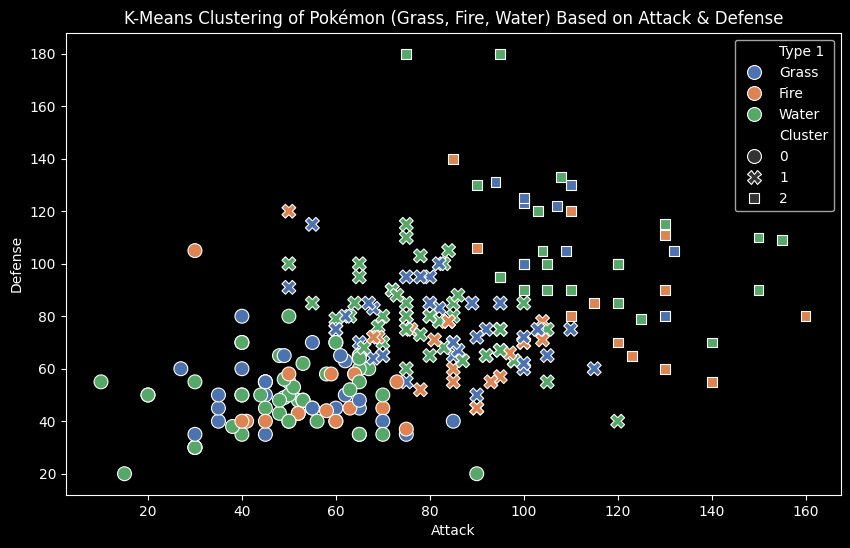

In [88]:
# Visualize the clusters compared to 'Type 1'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Attack', y='Defense', hue='Type 1', style='Cluster', palette='deep', s=100)
plt.title("K-Means Clustering of Pokémon (Grass, Fire, Water) Based on Attack & Defense")
plt.legend()
plt.show()

Text(0, 0.5, 'Defense')

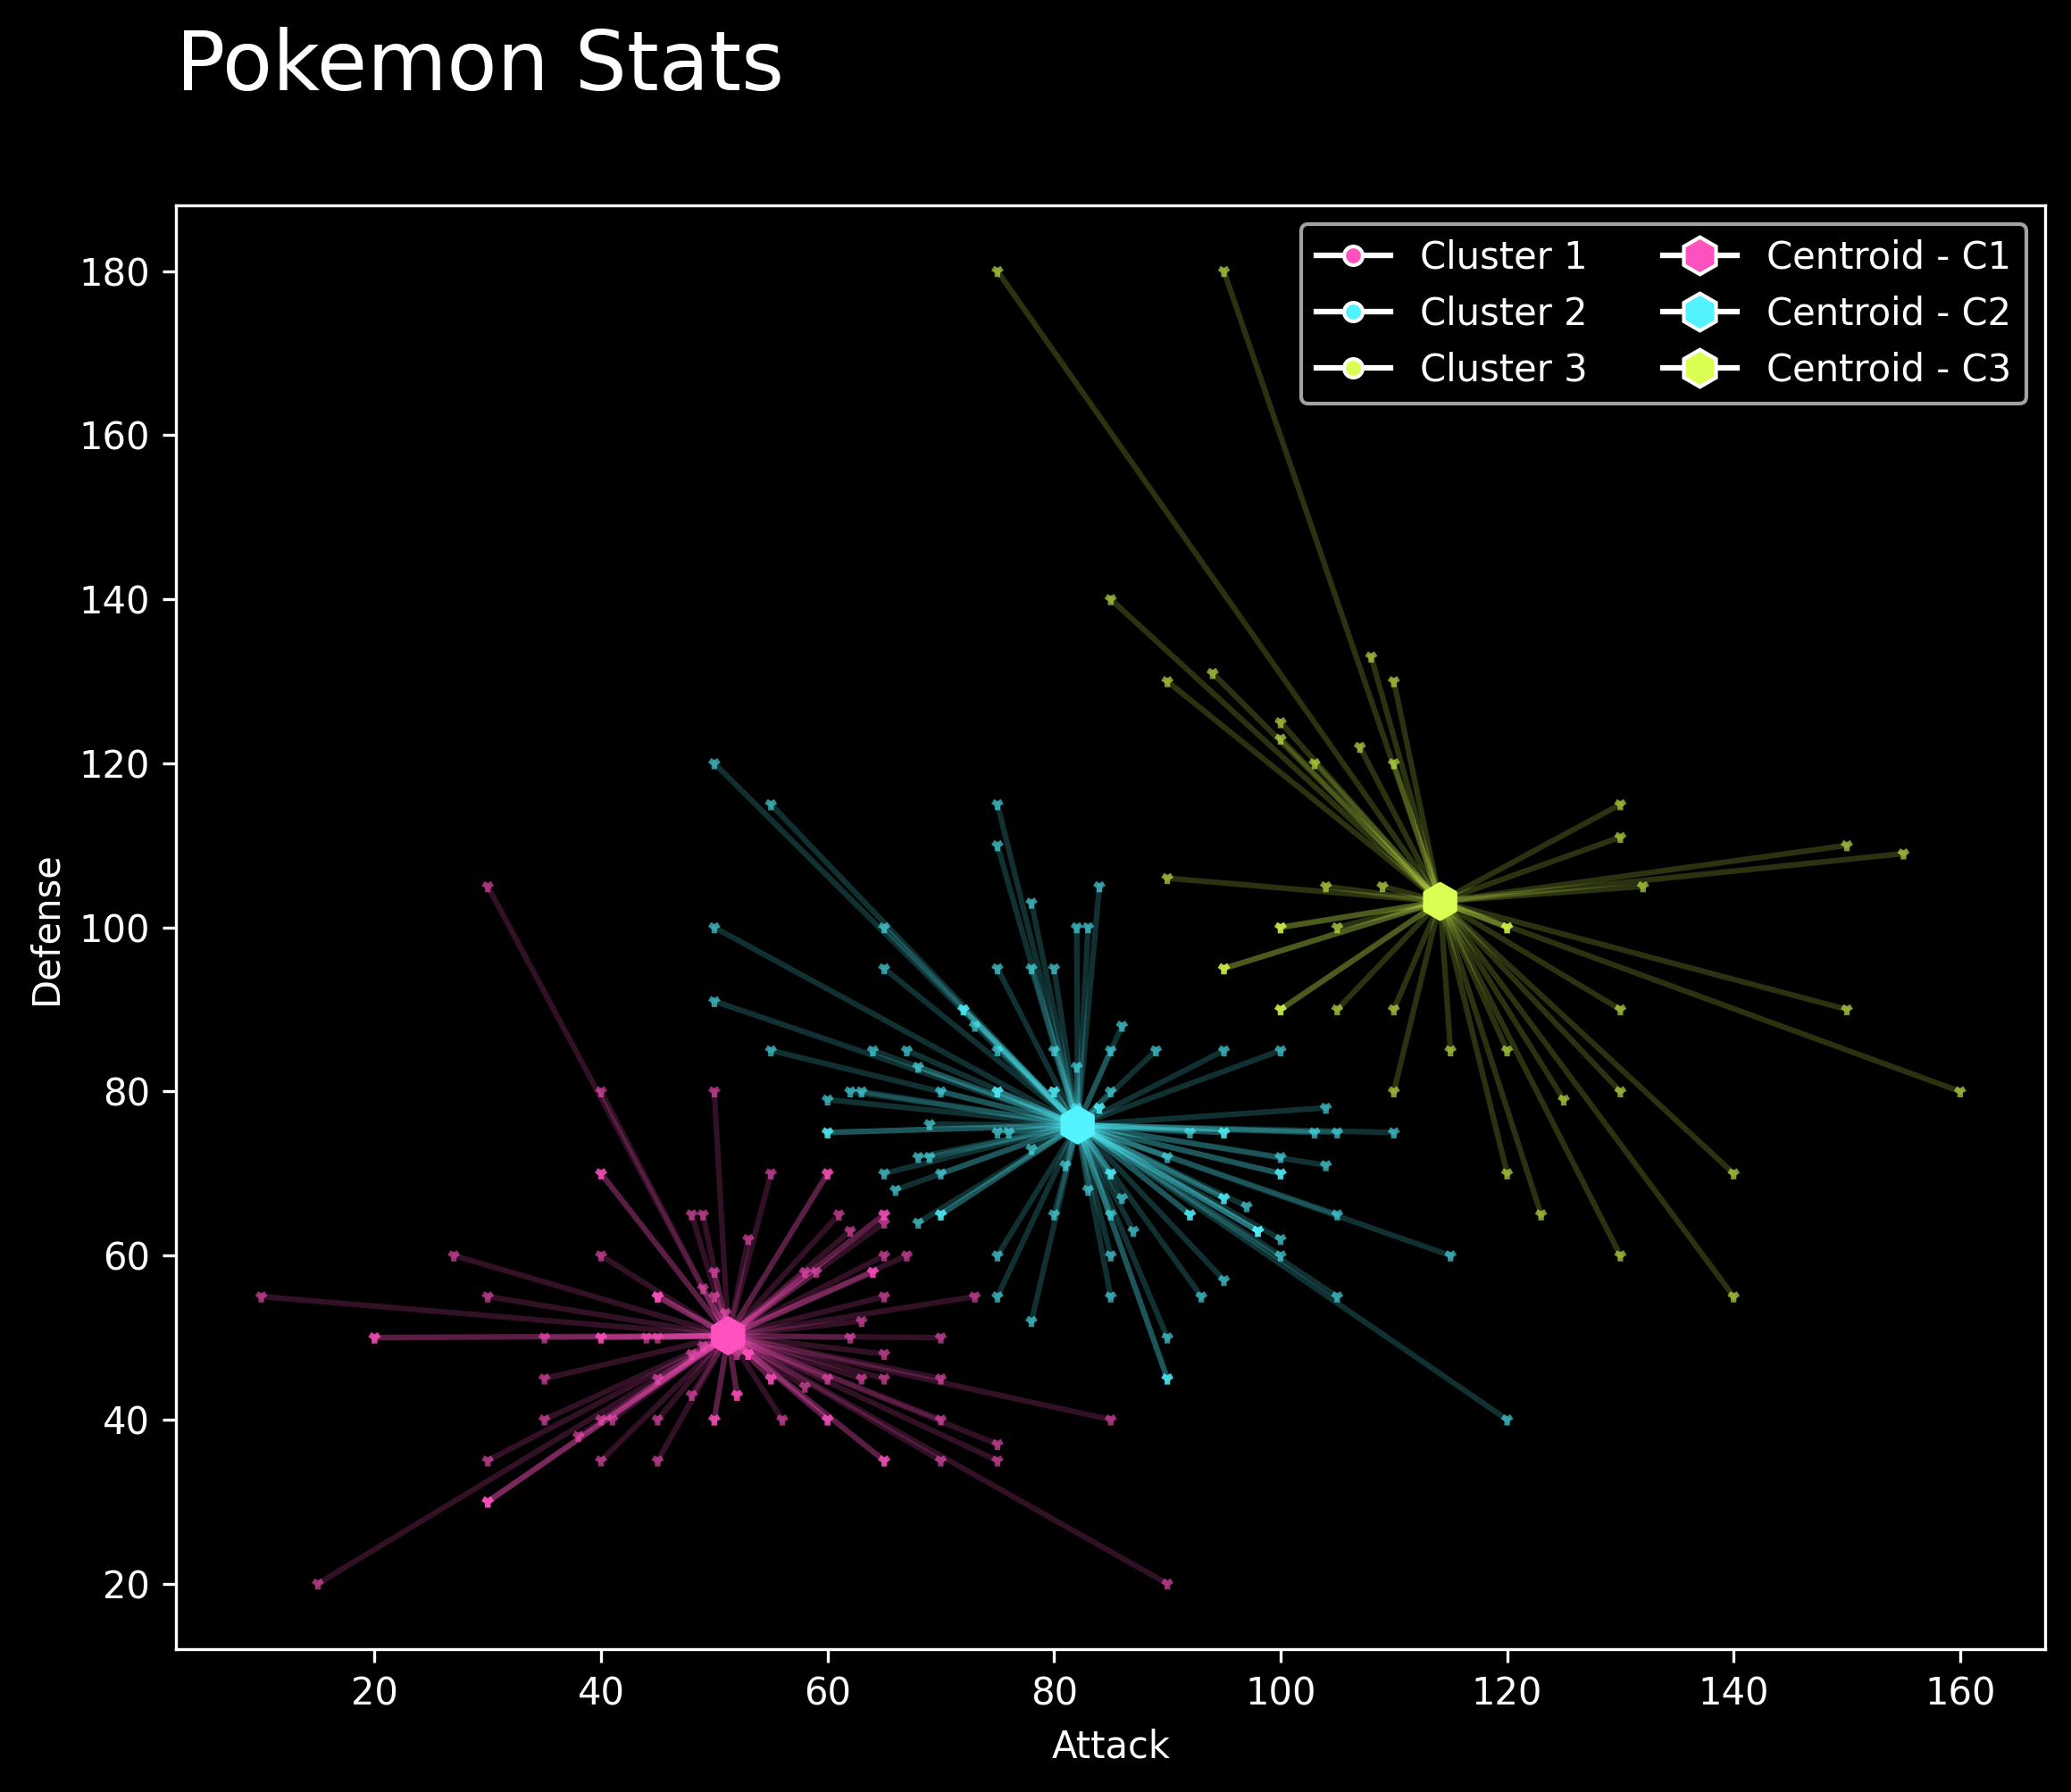

In [89]:
from matplotlib import lines
fig, ax = plt.subplots(figsize=(9, 7), dpi=300)

# Scatter plot for data points
plt.scatter(df['Attack'], df['Defense'], c=df['ClusterColor'], alpha=0.6, s=10, marker='1')

# Scatter plot for centroids
plt.scatter(cent_x, cent_y, marker='h', c=color_list, s=90)

# Draw lines from each point to its respective centroid
for _, row in df.iterrows():
    plt.plot([row.Attack, row.CentX], [row.Defense, row.CentY], c=row['ClusterColor'], alpha=0.2)

# Create legend elements
legend_elements = [
    lines.Line2D([0], [0], marker='o', color='w', label=f'Cluster {i+1}', markerfacecolor=color, markersize=5)
    for i, color in enumerate(color_list)
]
legend_elements += [
    lines.Line2D([0], [0], marker='h', color='w', label=f'Centroid - C{i+1}', markerfacecolor=color, markersize=10)
    for i, color in enumerate(color_list)
]

# Add legend to the plot
plt.legend(handles=legend_elements, loc='upper right', ncol=2)

# Add plot labels and title

plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')

Another example of visualization

Text(0, 0.5, 'Defense')

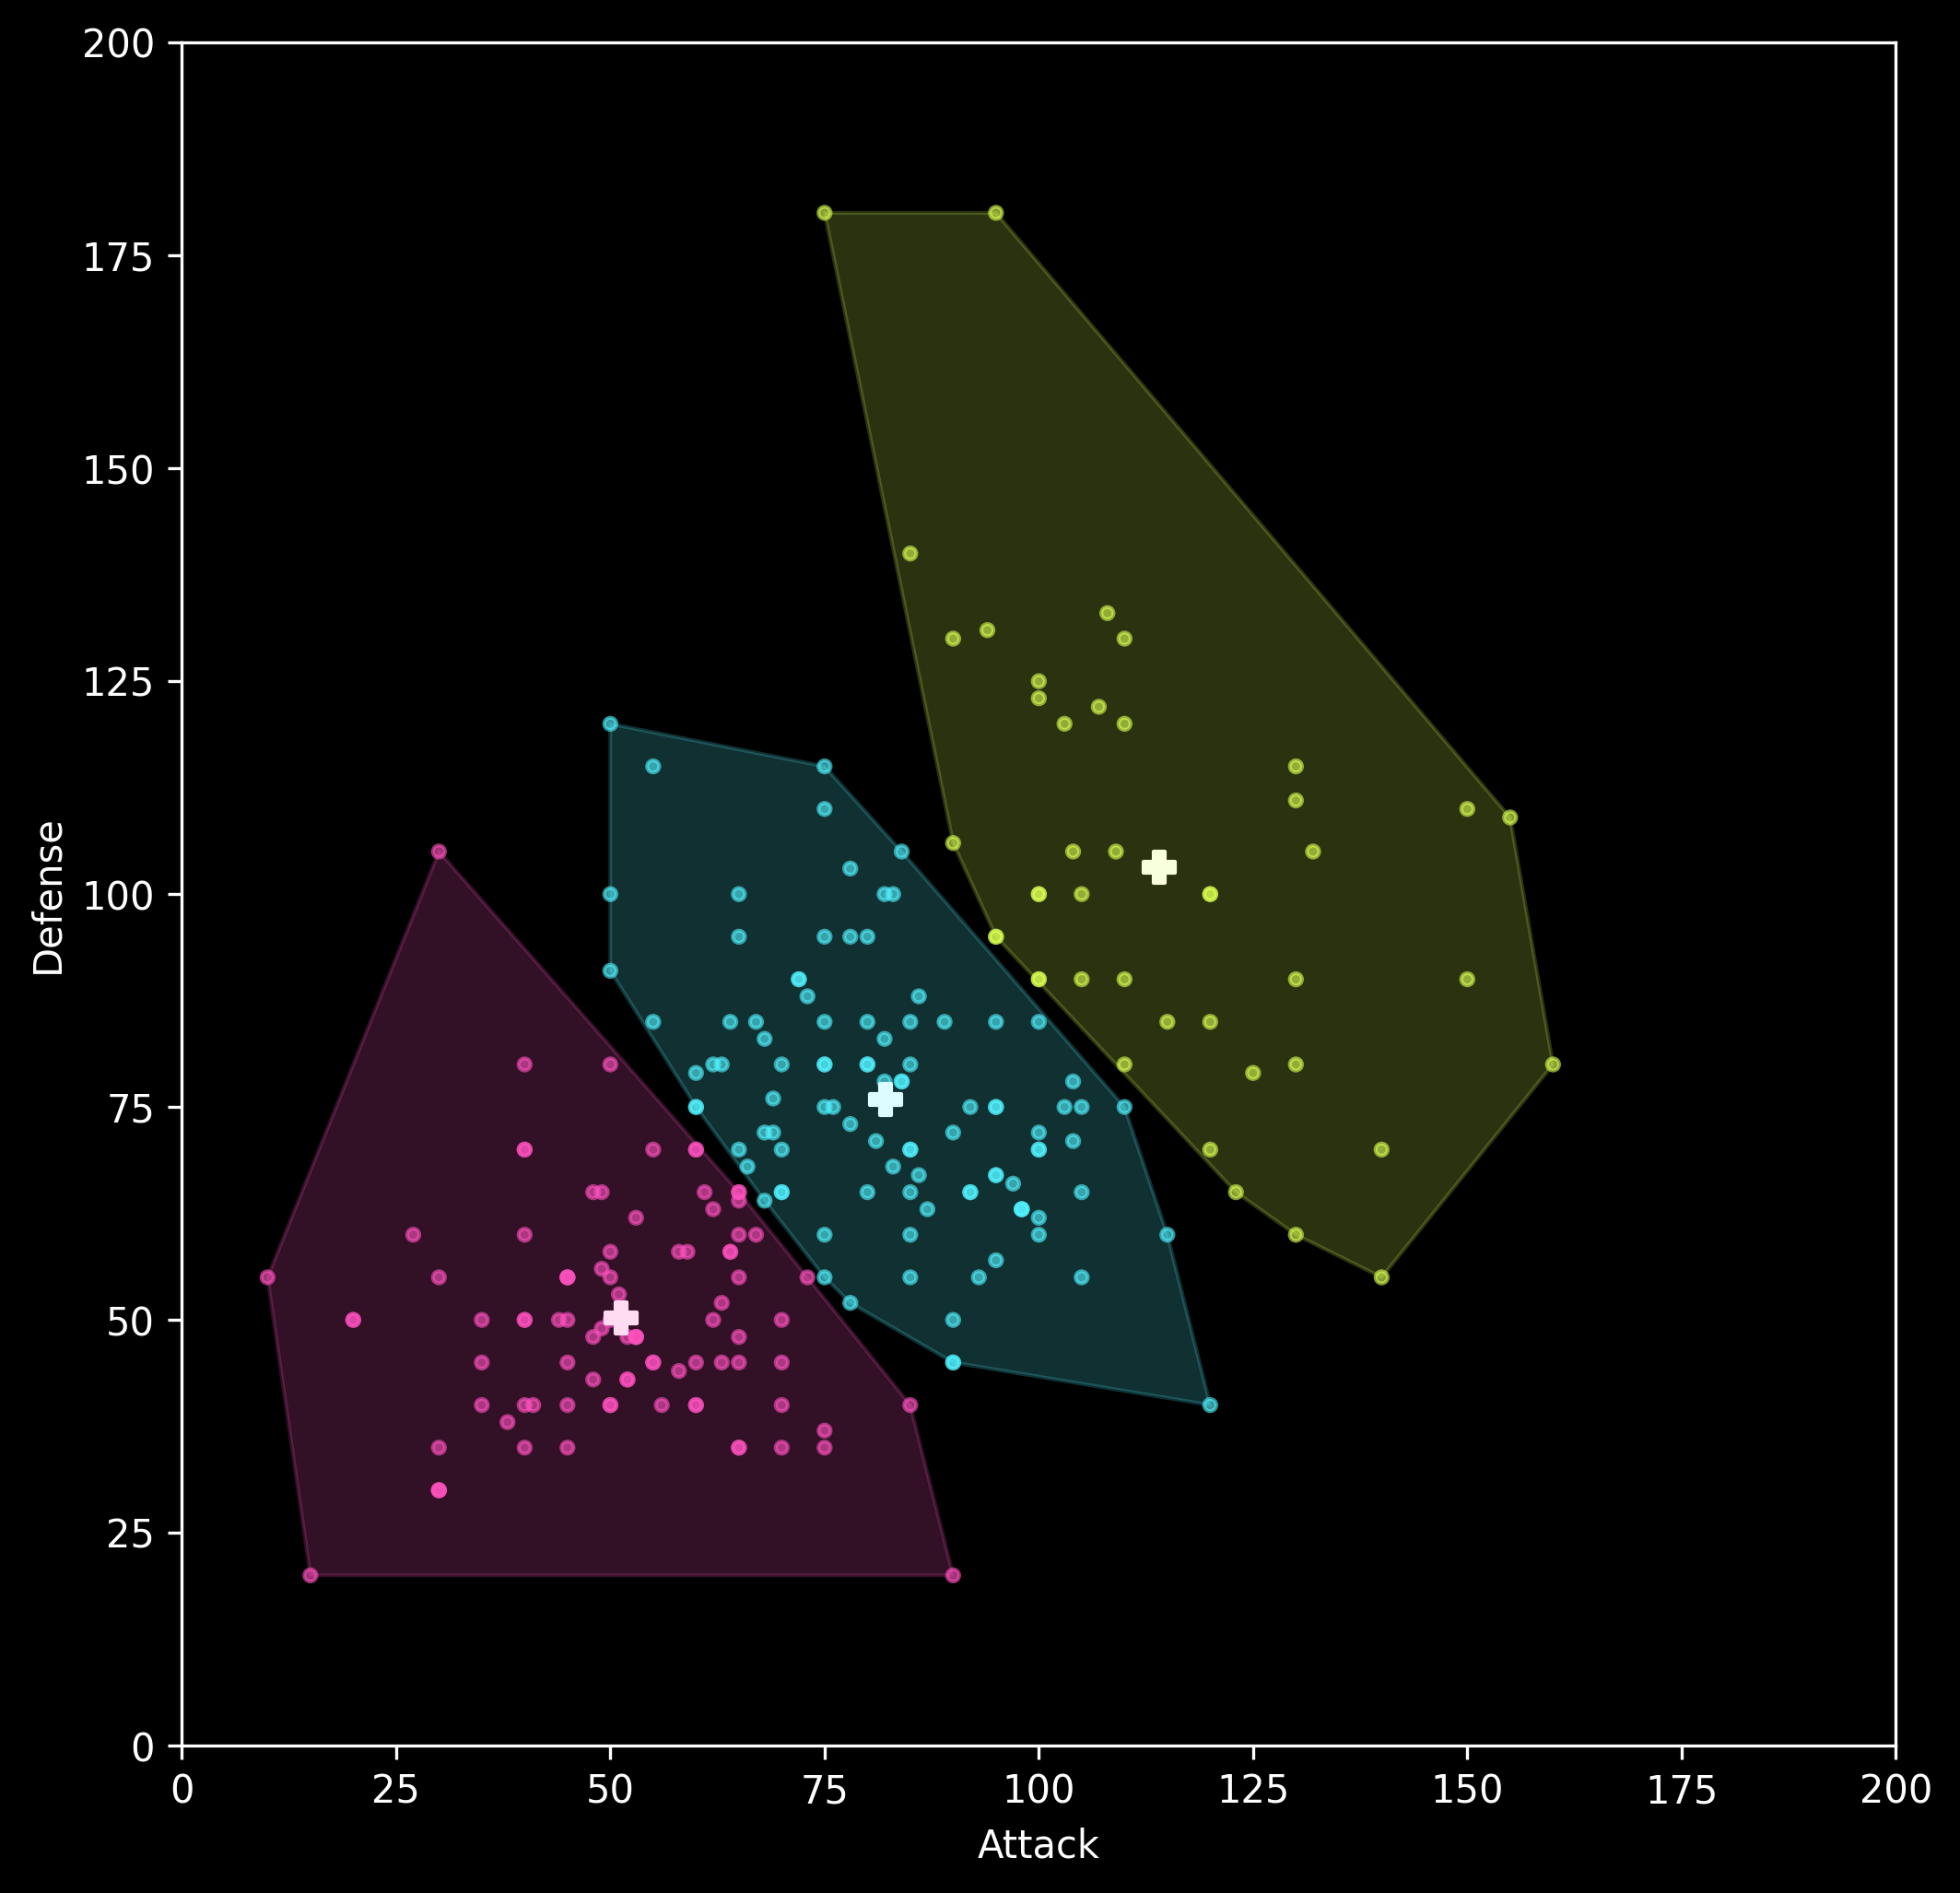

In [90]:
from scipy.spatial import ConvexHull
import numpy as np
fig, ax = plt.subplots(1, figsize=(8,8), dpi=300)
plt.scatter(df['Attack'], df['Defense'], c=df['ClusterColor'], alpha = 0.6, s=10)
plt.scatter(cent_x, cent_y, marker='P', c='white', s=70)
for i in df['Cluster'].unique():
    points = df[df['Cluster'] == i][['Attack', 'Defense']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    plt.fill(x_hull, y_hull, alpha=0.2, c=color_list[i])
    
plt.xlim(0,200)
plt.ylim(0,200)
plt.xlabel('Attack')
plt.ylabel('Defense')


### Cluster Summary/Interpretation

In [91]:
df.columns

Index(['Name', 'Type 1', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Cluster', 'CentX', 'CentY', 'ClusterColor',
       'Silhouette_Val'],
      dtype='object')

In [92]:
df.groupby(['Cluster'])[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed']].agg(['mean', 'median', 'min', 'max']).T

Cluster                  0       1           2
Total   mean    330.544444  472.39  557.340909
        median  317.000000  480.00  540.000000
        min     180.000000  305.00  325.000000
        max     540.000000  634.00  770.000000
HP      mean     55.355556   77.50   83.704545
        median   50.000000   75.00   89.000000
        min      20.000000   30.00   30.000000
        max     130.000000  170.00  115.000000
Attack  mean     51.222222   82.08  114.090909
        median   51.500000   82.00  110.000000
        min      10.000000   50.00   75.000000
        max      90.000000  120.00  160.000000
Defense mean     50.222222   75.91  103.159091
        median   50.000000   75.00  100.000000
        min      20.000000   40.00   55.000000
        max     105.000000  120.00  180.000000
Sp. Atk mean     59.211111   88.24   97.227273
        median   60.000000   90.00   95.000000
        min      10.000000   15.00   25.000000
        max     140.000000  159.00  180.000000
Sp. Def mean     56.711111   76.15   87.818182
        median   54.500000   75.00   85.000000
        min      20.000000   25.00   25.000000
        max     140.000000  129.00  160.000000
Speed   mean     57.822222   72.51   71.340909
        median   60.000000   70.00   76.000000
        min      15.000000   10.00   20.000000
        max     110.000000  145.00  105.000000

#### Suppose we have to use the model on unseen data, since it's already trained, use predict 


In [93]:
unseen_dataset =  np.random.randint(60, 161, size=(30, 2))
unseen_df = pd.DataFrame(unseen_dataset, columns=['Attack', 'Defense'])
unseen_df

,Attack,Defense
0,136,121
1,120,94
2,110,63
3,125,86
4,98,115
5,141,78
6,153,129
7,87,133
8,104,77
9,115,80


In [94]:
unseen_df['Cluster'] = kmeans_model.predict(unseen_df)
unseen_df.head()

,Attack,Defense,Cluster
0,136,121,2
1,120,94,2
2,110,63,1
3,125,86,2
4,98,115,2


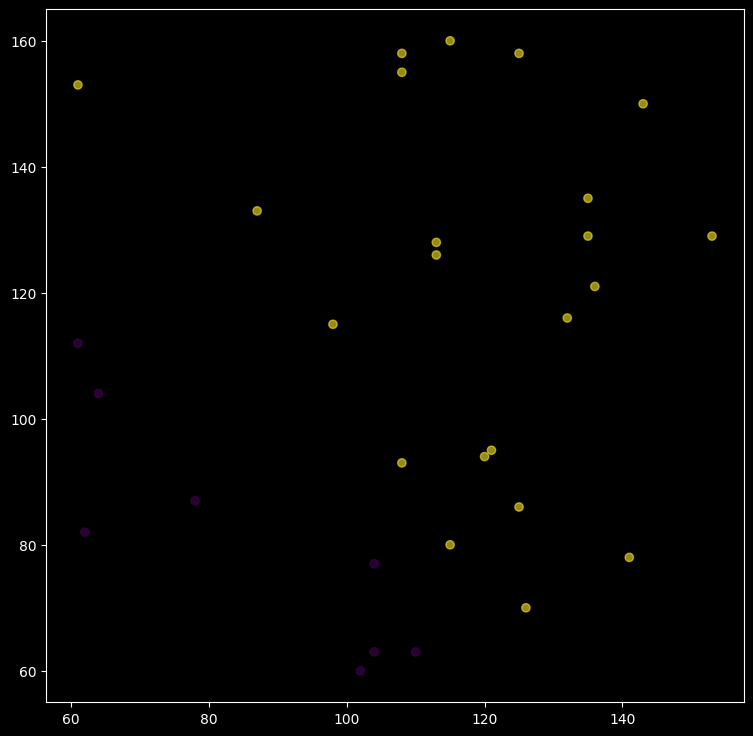

In [95]:
plt.figure(figsize=(9,9))
plt.scatter(x=unseen_df['Attack'], y=unseen_df['Defense'], c=unseen_df['Cluster'], alpha=.6)

## Identifying The Optimal Number of Clusters Using The Elbow Method

In [96]:
df = pd.read_csv(path+'Mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [97]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [98]:
X = df[['Annual Income (k$)',
       'Spending Score (1-100)']]

X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


- The elbow method is a popular technique used to determine the optimal number of clusters (k) in a unsupervised clustering algorithm.
- The goal is visually identify the "elbow" point in the plot of variance explained by clusters vs number of clusters.
-Steps:
    1. Select a range of k-values e.g. 1 to 10 clusters
    2. Compute the clusters for each k-value
    3. Calculate the WCSS (Within-Cluster Sum of Squares) for each k-value cluster. It basically represents the variance within the cluster.
    4. Plot k-values vs WCSS
    5. Identify the **Elbow Point**: It's the value of k where the curve starts to flatten out. The elbow point is the optimal number of k.

In [99]:
# build a blank list of WCSS and k-values
wcss_value_list = []
k_value_list = range(1,11)

for k_val in k_value_list:
    #deploy the model and fit
    kmeans_model = KMeans(n_clusters=k_val, n_init='auto', random_state=10)
    kmeans_model.fit(X)

    #calculate WCSS
    wcss_val = kmeans_model.inertia_

    #append value into wcss list
    wcss_value_list.append(wcss_val)

    #print the outcome of each val
    print(f'k-means model with {k_val} clusters \t| WCSS value: {wcss_val:.1f}')


k-means model with 1 clusters 	| WCSS value: 269981.3
k-means model with 2 clusters 	| WCSS value: 184610.0
k-means model with 3 clusters 	| WCSS value: 106348.4
k-means model with 4 clusters 	| WCSS value: 73880.6
k-means model with 5 clusters 	| WCSS value: 44448.5
k-means model with 6 clusters 	| WCSS value: 37265.9
k-means model with 7 clusters 	| WCSS value: 31632.3
k-means model with 8 clusters 	| WCSS value: 25038.8
k-means model with 9 clusters 	| WCSS value: 23337.4
k-means model with 10 clusters 	| WCSS value: 20137.4


''

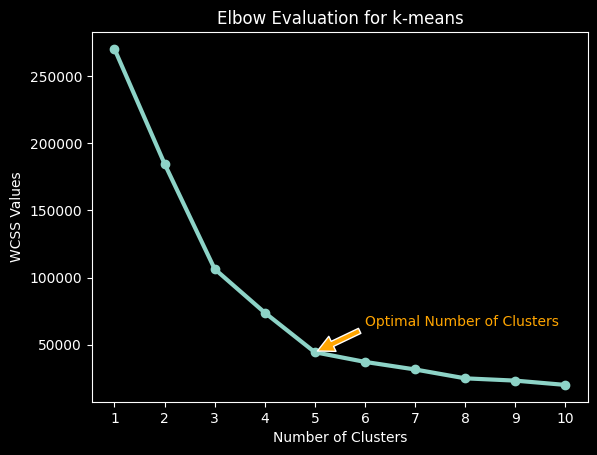

In [100]:
plt.plot(k_value_list, wcss_value_list, linewidth=3)
plt.scatter(k_value_list, wcss_value_list)

point_x = 5
point_y = wcss_value_list[point_x-1]

plt.annotate('Optimal Number of Clusters', xy=(point_x, point_y), xytext=(point_x +1, point_y+20000),
            arrowprops=dict(facecolor='orange', shrink=0.05),
            color='orange'
            )

plt.title('Elbow Evaluation for k-means')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Values')
plt.xticks(k_value_list)
;

In [101]:
point_y

44448.45544793371

Now, we can use the optimal number of clusters (k=5) for our model

In [102]:
kmeans_model = KMeans(n_clusters=5, n_init='auto', random_state=10)
df['Cluster'] = kmeans_model.fit_predict(X)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [103]:
centroids = kmeans_model.cluster_centers_
cent_x = centroids[:,0]
cent_y = centroids[:,1]

df['CentX'] = df['Cluster'].map({0:cent_x[0],
                                1:cent_x[1],
                                2:cent_x[2],
                                3:cent_x[3],
                                4:cent_x[4]})

df['CentY'] = df['Cluster'].map({0:cent_y[0],
                                1:cent_y[1],
                                2:cent_y[2],
                                3:cent_y[3],
                                4:cent_y[4]})

color_list = ['#ff52bf', '#52f3ff', '#d9ff52', '#ffbe86', '#ff4221']

df['ClusterColor'] = df['Cluster'].map({0:color_list[0],
                                        1:color_list[1],
                                        2:color_list[2],
                                        3:color_list[3],
                                        4:color_list[4]})

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,CentX,CentY,ClusterColor
0,1,Male,19,15,39,4,26.304348,20.913043,#ff4221
1,2,Male,21,15,81,2,25.727273,79.363636,#d9ff52
2,3,Female,20,16,6,4,26.304348,20.913043,#ff4221
3,4,Female,23,16,77,2,25.727273,79.363636,#d9ff52
4,5,Female,31,17,40,4,26.304348,20.913043,#ff4221


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


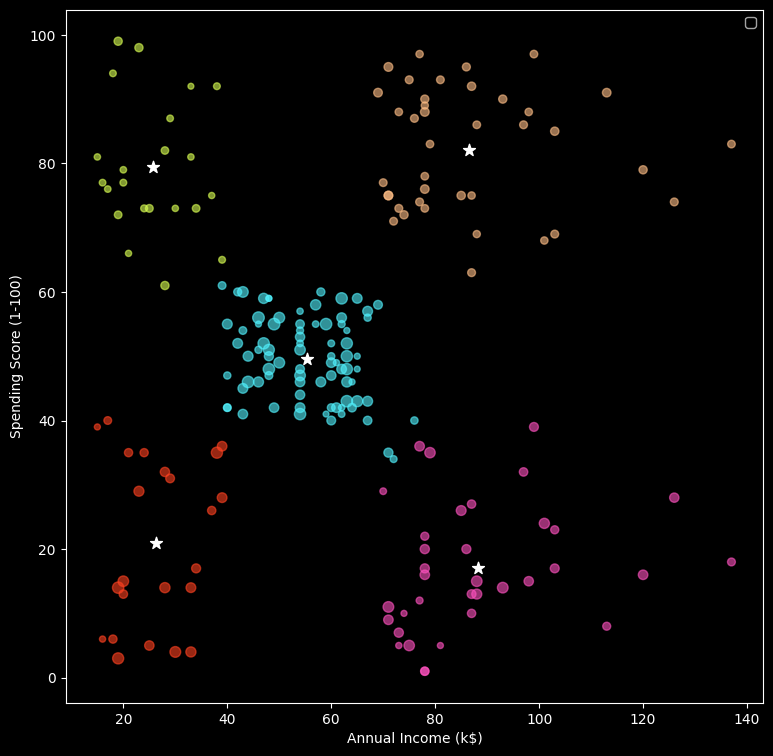

In [104]:
plt.figure(figsize=(9,9))

plt.scatter(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], c=df['ClusterColor'], s=df['Age'], alpha=0.6)
plt.scatter(x=cent_x, y=cent_y, c='white', marker='*', s=80)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

In [ ]:
plt.figure()
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='prism', alpha=0.6)



Clusters:
- **High Spenders, High Income:** These individuals have a high income and correspondingly high spending habits. They might prioritize luxury, convenience, or experiences, and feel comfortable spending money to maintain a certain lifestyle.
Behavioral explanation: This group may value status, enjoyment, or freedom, and believe that spending money is a way to reward themselves or showcase their success.
- **High Spenders, Low Income:** These individuals have a lower income but still engage in high spending habits, potentially leading to financial strain. They might prioritize short-term gratification or use spending as a coping mechanism.
Behavioral explanation: This group may struggle with budgeting, prioritize wants over needs, or use spending as a way to escape financial stress or other emotional challenges.
- **Low Spenders, High Income:** These individuals have a high income but maintain frugal spending habits, potentially prioritizing savings, investments, or long-term financial goals.
Behavioral explanation: This group may value financial security, be risk-averse, or prioritize saving for the future over immediate consumption.
- **Low Spenders, Low Income:** These individuals have a lower income and correspondingly low spending habits, potentially due to financial necessity or a focus on essential expenses.

Additional, focused analysis. e.g. the group in the center since it's tricky

In [ ]:
df[df['Cluster']==1].groupby('Gender')[['Age','Annual Income (k$)','Spending Score (1-100)']].agg(['mean', 'median', 'min','max']).T